In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Reading and understanding the data

In [2]:
df = pd.read_csv('train_FD001.txt', sep=" ", header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [4]:
df.shape

(20631, 28)

In [5]:
# removing columns 26 and 27
df.drop([26, 27], inplace=True, axis=1)

#### Naming the columns with appropriate name
- Column 1 : Unit Number
- Column 2 : Times, in cycle
- Columns 3-5 : Operational Settings
- Columns 6-25 : Sensor Measurments

In [6]:
df.columns = ["Unit No", 'Cycle', 'OS1', 'OS2', 'OS3', 'SM1', 'SM2', 'SM3', 'SM4', 'SM5', 'SM6', 'SM7', 'SM8', 'SM9', 'SM10', 'SM11', 'SM12', 'SM13', 'SM14', 'SM15', 'SM16', 'SM17', 'SM18', 'SM19', 'SM20', 'SM21',]

In [7]:
df.sample(3)

,Unit No,Cycle,OS1,OS2,OS3,SM1,SM2,SM3,SM4,SM5,...,SM12,SM13,SM14,SM15,SM16,SM17,SM18,SM19,SM20,SM21
17085,84,201,-0.0006,-0.0004,100.0,518.67,643.07,1603.59,1414.73,14.62,...,520.44,2388.15,8138.51,8.4553,0.03,394,2388,100.0,38.56,23.1552
16552,82,175,0.0015,0.0000,100.0,518.67,642.33,1598.41,1409.12,14.62,...,521.61,2388.03,8180.99,8.4387,0.03,395,2388,100.0,38.64,23.2877
18451,91,72,-0.0020,0.0002,100.0,518.67,643.35,1594.34,1412.89,14.62,...,521.20,2388.14,8130.27,8.4537,0.03,395,2388,100.0,38.76,23.2917


In [8]:
# checking there is any null values
df.isnull().sum()

Unit No    0
Cycle      0
OS1        0
OS2        0
OS3        0
SM1        0
SM2        0
SM3        0
SM4        0
SM5        0
SM6        0
SM7        0
SM8        0
SM9        0
SM10       0
SM11       0
SM12       0
SM13       0
SM14       0
SM15       0
SM16       0
SM17       0
SM18       0
SM19       0
SM20       0
SM21       0
dtype: int64

In [9]:
# checking there is any duplicate values
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Unit No  20631 non-null  int64  
 1   Cycle    20631 non-null  int64  
 2   OS1      20631 non-null  float64
 3   OS2      20631 non-null  float64
 4   OS3      20631 non-null  float64
 5   SM1      20631 non-null  float64
 6   SM2      20631 non-null  float64
 7   SM3      20631 non-null  float64
 8   SM4      20631 non-null  float64
 9   SM5      20631 non-null  float64
 10  SM6      20631 non-null  float64
 11  SM7      20631 non-null  float64
 12  SM8      20631 non-null  float64
 13  SM9      20631 non-null  float64
 14  SM10     20631 non-null  float64
 15  SM11     20631 non-null  float64
 16  SM12     20631 non-null  float64
 17  SM13     20631 non-null  float64
 18  SM14     20631 non-null  float64
 19  SM15     20631 non-null  float64
 20  SM16     20631 non-null  float64
 21  SM17     206

In [11]:
df.describe()

,Unit No,Cycle,OS1,OS2,OS3,SM1,SM2,SM3,SM4,SM5,...,SM12,SM13,SM14,SM15,SM16,SM17,SM18,SM19,SM20,SM21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [12]:
# distinct observation in a column
df.nunique(axis=0)

Unit No     100
Cycle       362
OS1         158
OS2          13
OS3           1
SM1           1
SM2         310
SM3        3012
SM4        4051
SM5           1
SM6           2
SM7         513
SM8          53
SM9        6403
SM10          1
SM11        159
SM12        427
SM13         56
SM14       6078
SM15       1918
SM16          1
SM17         13
SM18          1
SM19          1
SM20        120
SM21       4745
dtype: int64

In [13]:
# each unit maximum cycle
df.groupby('Unit No')['Cycle'].max()

Unit No
1      192
2      287
3      179
4      189
5      269
      ... 
96     336
97     202
98     156
99     185
100    200
Name: Cycle, Length: 100, dtype: int64

In [14]:
min_cycle = df.groupby('Unit No')['Cycle'].max().min()
max_cycle = df.groupby('Unit No')['Cycle'].max().max()
print("Least of the Max Cycle by a Unit :", min_cycle)
print("Largest of the Max Cycle by a Unit :", max_cycle )

Least of the Max Cycle by a Unit : 128
Largest of the Max Cycle by a Unit : 362


### Initial Observation
- There are 20631 data points with 26 columns
- No null values and duplicate values
- The datatypes are int64 and float64
- There are 100 Units with varying cylces.
- Number of Cycle completed before failing is range from 128 to 362
- The Sensor Measurements are of different scales.
- Some features like OS3, SM1, SM5, SM6, SM10, SM16, SM18, SM19 need to be removed or ignored.
- Need to create the prediction column

### Creating the target variable

In [15]:
max_cycle = df[df["Unit No"] == 2].Cycle.max()

In [16]:
rul = max_cycle - df[df["Unit No"] == 2].Cycle

In [17]:
rul.shape

(287,)

In [18]:
def remaining_cycle(df, number_of_units):
    rul_values = []
    for i in range(1, number_of_units + 1):
        max_cycle = df[df["Unit No"] == i].Cycle.max()
        rul = max_cycle - df[df["Unit No"] == i].Cycle
        rul_values.extend(rul.tolist())
    rul_df = pd.DataFrame({'RUL': rul_values})
    return rul_df


In [19]:
rul_df = remaining_cycle(df, 100)

In [20]:
rul_df

,RUL
0,191
1,190
2,189
3,188
4,187
...,...
20626,4
20627,3
20628,2
20629,1


In [21]:
train_df = pd.concat([df, rul_df],axis=1)

In [22]:
train_df.head()

,Unit No,Cycle,OS1,OS2,OS3,SM1,SM2,SM3,SM4,SM5,...,SM13,SM14,SM15,SM16,SM17,SM18,SM19,SM20,SM21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


### Univariate analysis

<AxesSubplot: ylabel='Density'>

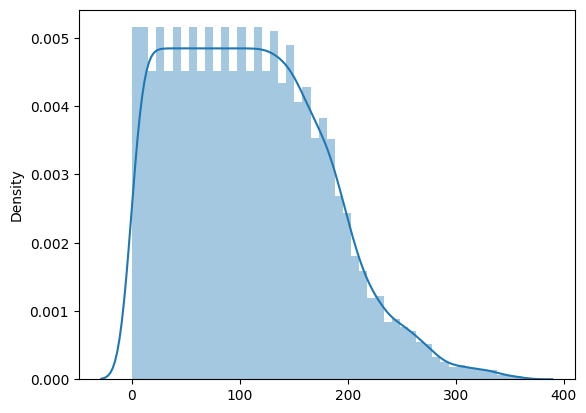

In [29]:
# distribution of RUL 
sns.distplot(x=train_df["RUL"])

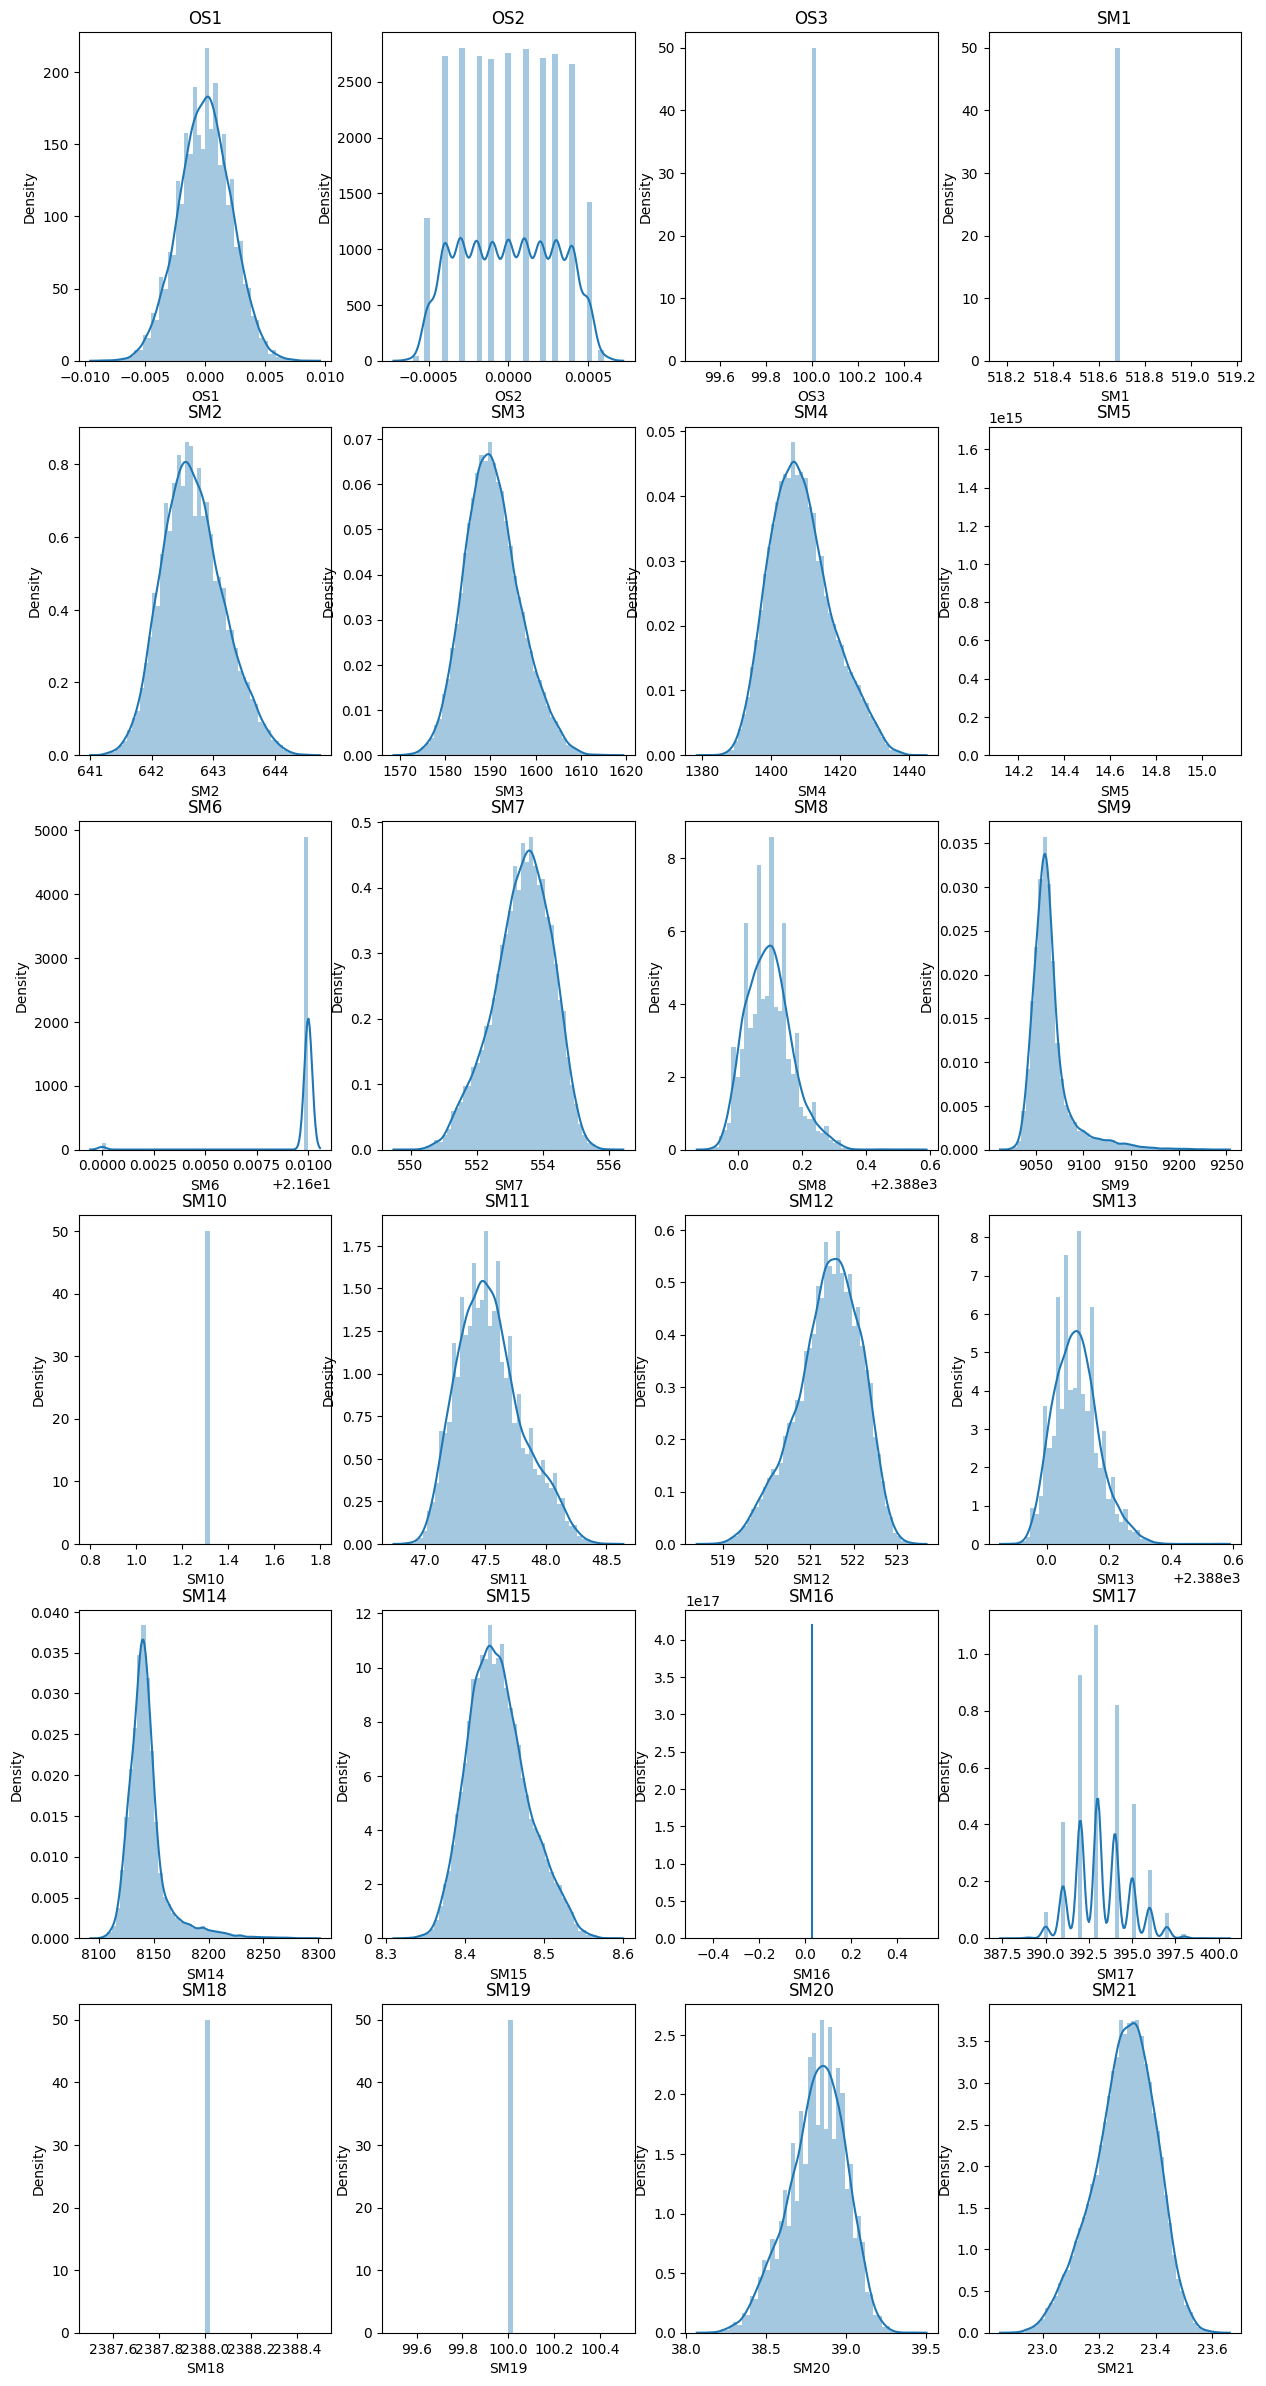

In [42]:
# distribution of features

plt.figure(figsize = (15, 35))
for i in range(1, 25):
    plt.subplot(7,4, i)
    sns.distplot(df.iloc[:, i+1])
    plt.title(df.columns[i+1])
plt.show()

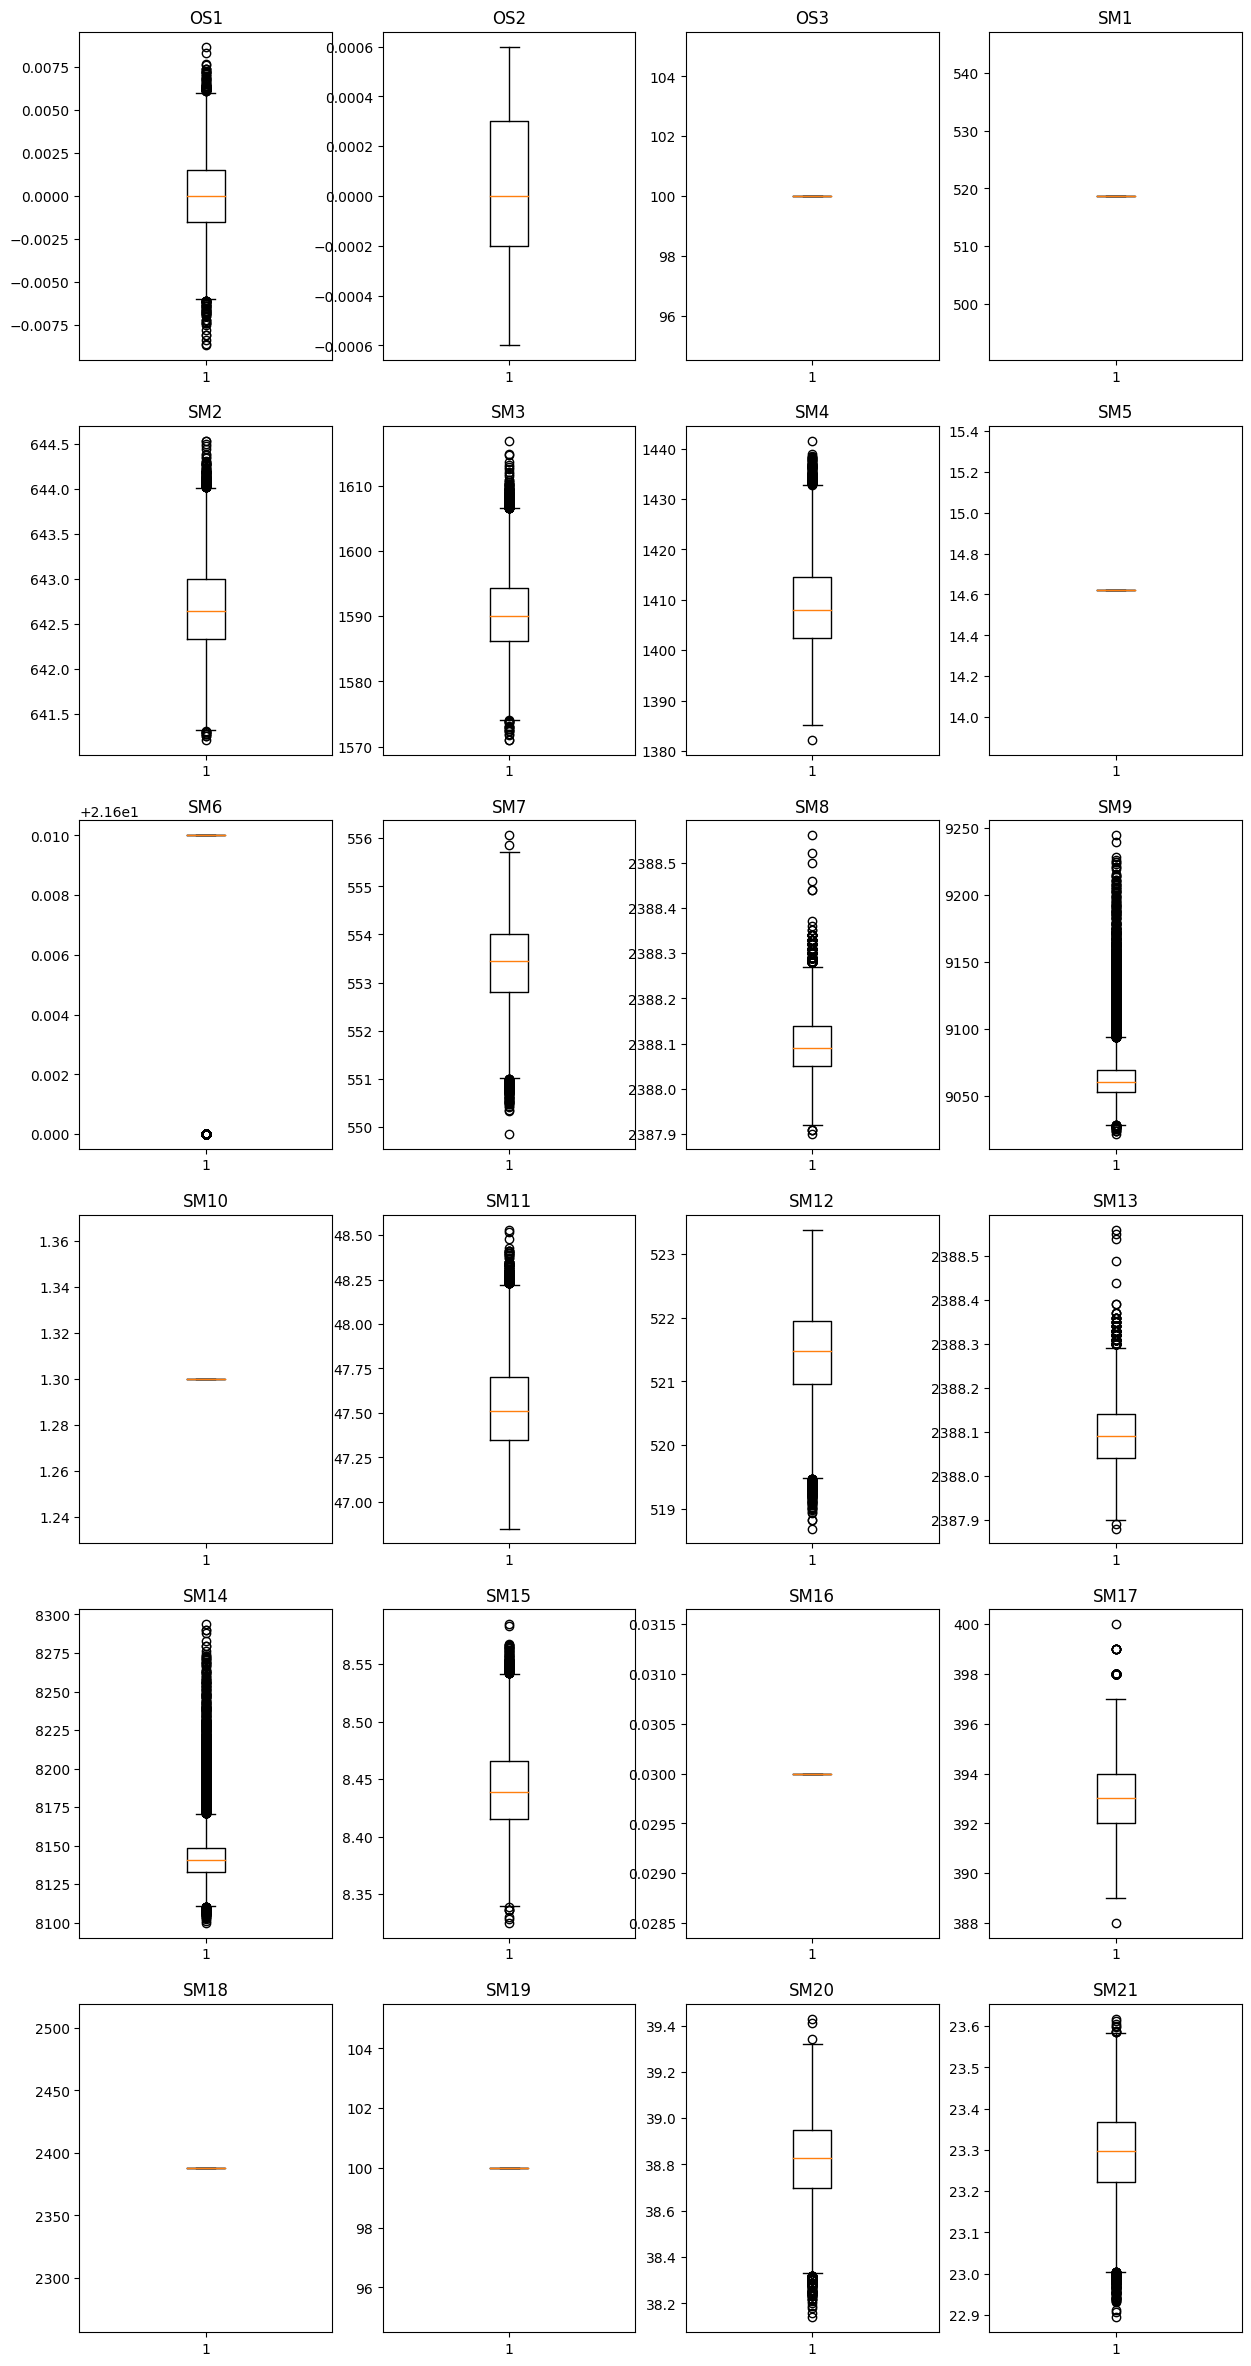

In [44]:
# Boxplot of features

plt.figure(figsize = (15, 35))
for i in range(1, 25):
    plt.subplot(7,4, i)
    plt.boxplot(df.iloc[:, i+1])
    plt.title(df.columns[i+1])
plt.show()

### Insights 

- OP1 and most of the SM's are normally distributed.
- Confirm that OS3, SM1, SM5, SM6, SM10, SM16, SM18 and SM19 have no use in predicting the RUL.
- Expect OS2 and SM17, there are significant amount of outliers present in other features.
- Cannot able to simply remove those outliers as they are genuine observations that reflect actual scenarios, they might be   relevant for modeling. 

### Bivariate analysis

In [45]:
train_df.columns

Index(['Unit No', 'Cycle', 'OS1', 'OS2', 'OS3', 'SM1', 'SM2', 'SM3', 'SM4',
       'SM5', 'SM6', 'SM7', 'SM8', 'SM9', 'SM10', 'SM11', 'SM12', 'SM13',
       'SM14', 'SM15', 'SM16', 'SM17', 'SM18', 'SM19', 'SM20', 'SM21', 'RUL'],
      dtype='object')

In [53]:
numerical_features[i-1]

'OS1'

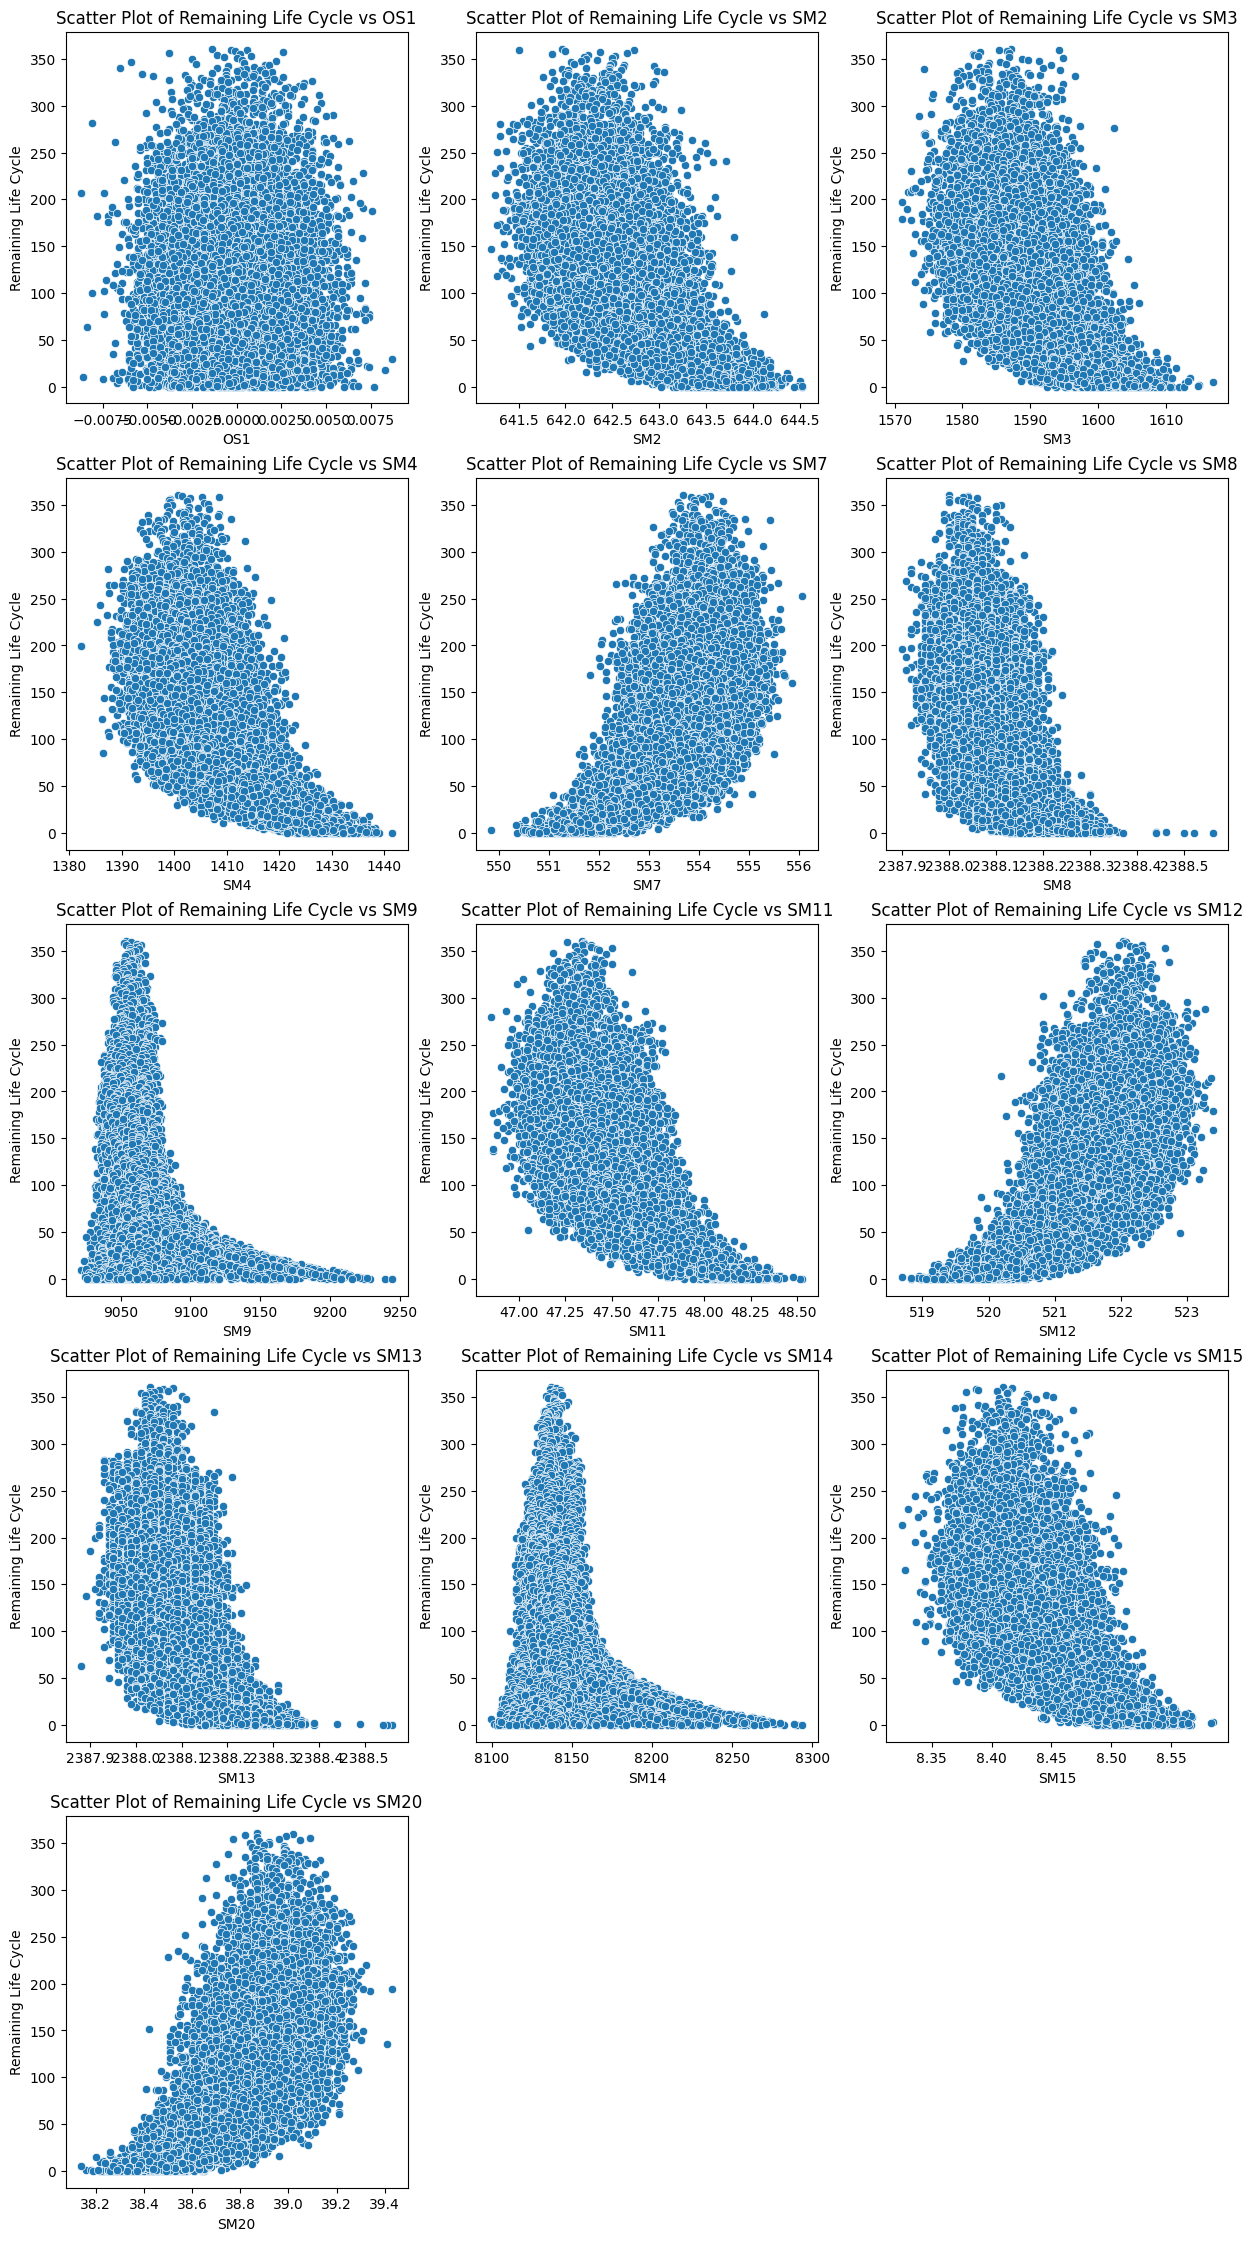

In [58]:
# Scatterplot of RUL with numerical features

numerical_features = ['OS1', 'SM2', 'SM3', 'SM4', 'SM7', 'SM8', 'SM9', 'SM11', 'SM12', 'SM13', 'SM14', 'SM15',  'SM20', 'SM21']

plt.figure(figsize = (15, 28))
for i in range(1, len(numerical_features)):
    plt.subplot(5,3, i)
    sns.scatterplot(x=numerical_features[i-1], y='RUL', data=train_df)
    plt.xlabel(numerical_features[i-1])
    plt.ylabel('Remaining Life Cycle')
    plt.title(f'Scatter Plot of Remaining Life Cycle vs {numerical_features[i-1]}' )
plt.show()

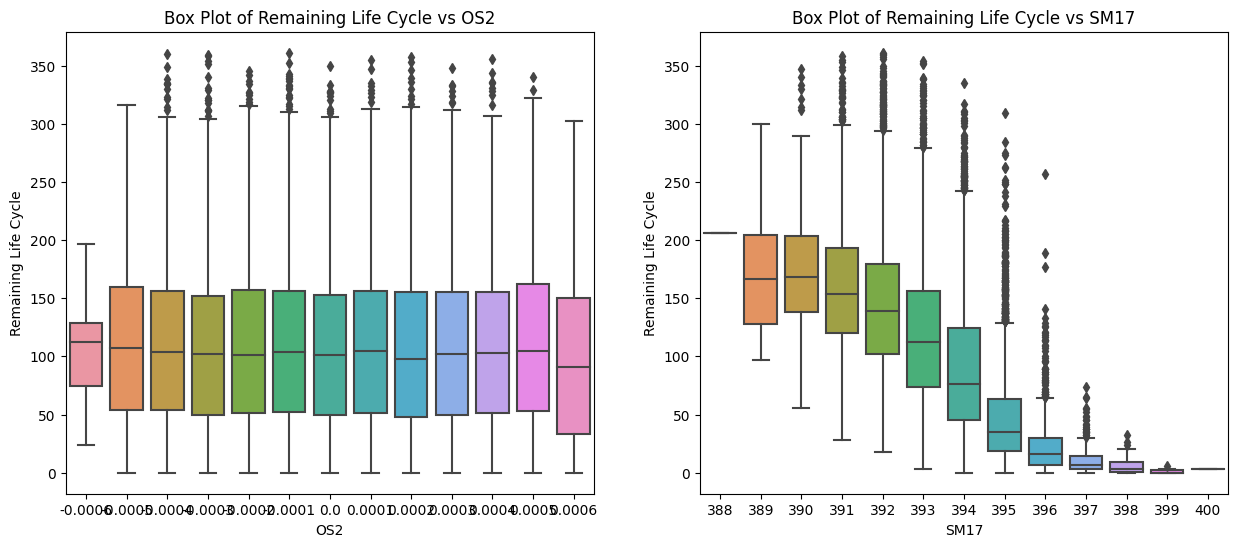

In [64]:
# Boxplot of RUL with categorical features

categorical_features = ['OS2', 'SM17',]

plt.figure(figsize = (15, 6))
for i in range(1, len(categorical_features) + 1):
    plt.subplot(1,2, i)
    sns.boxplot(x=categorical_features[i-1], y='RUL', data=train_df)
    plt.xlabel(categorical_features[i-1])
    plt.ylabel('Remaining Life Cycle')
    plt.title(f'Box Plot of Remaining Life Cycle vs {categorical_features[i-1]}' )
plt.show()

#### Insights

- some sort of relation between features and RUL are visible from the scatterplot.
- The relation between some feature with RUL are same as some other features.
- As the value of SM2, SM3, SM4, SM11, SM15 are more than 75% range. Then approximately the RUL is less than 50 cylces.
- As the value of SM7, SM12, SM20 are less than 25% range. Then approximately the RUL is less than 50 cycles.
- SM9 and SM14 behaving the same, after 50% range. Then approximately the RUL is less than 50 cycles.
- Nothing much can decode from the OS2.
- In SM17 it is visible that after 396 most data points falls under less than 50 cycle range.

### Heatmap

In [69]:
# creating list with features that have correlation less than 0.6
unwanted_columns = []

for col in train_df.columns:
    corr = train_df[col].corr(train_df["RUL"])
    if abs(corr) > 0.6:
        pass
    else:
        unwanted_columns.append(col)

In [70]:
corr_df = train_df.drop(columns=unwanted_columns)

,Cycle,SM2,SM3,SM4,SM7,SM8,SM11,SM12,SM13,SM15,SM17,SM20,SM21,RUL
0,1,641.82,1589.70,1400.60,554.36,2388.06,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
1,2,642.15,1591.82,1403.14,553.75,2388.04,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2,3,642.35,1587.99,1404.20,554.26,2388.08,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
3,4,642.35,1582.79,1401.87,554.45,2388.11,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
4,5,642.37,1582.85,1406.22,554.00,2388.06,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,196,643.49,1597.98,1428.63,551.43,2388.19,48.07,519.49,2388.26,8.4956,397,38.49,22.9735,4
20627,197,643.54,1604.50,1433.58,550.86,2388.23,48.04,519.68,2388.22,8.5139,395,38.30,23.1594,3
20628,198,643.42,1602.46,1428.18,550.94,2388.24,48.09,520.01,2388.24,8.5646,398,38.44,22.9333,2
20629,199,643.23,1605.26,1426.53,550.68,2388.25,48.39,519.67,2388.23,8.5389,395,38.29,23.0640,1


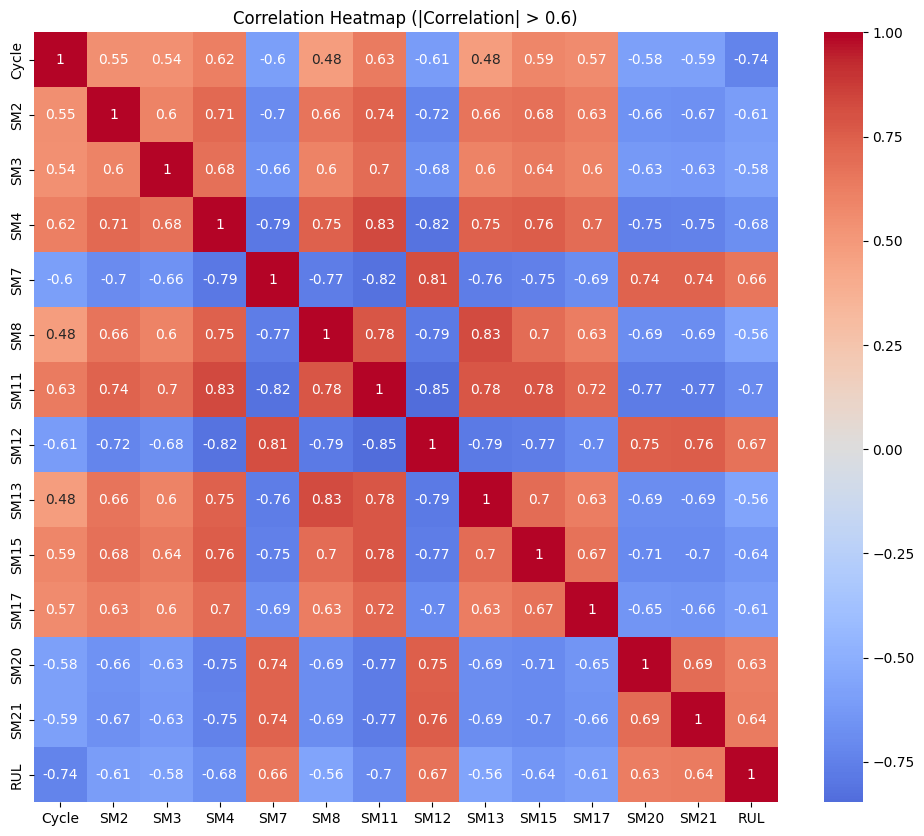

In [72]:
# correlation matrix
corr_matrix = corr_df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title('Correlation Heatmap (|Correlation| > 0.6)')
plt.show()


#### Insights from heatmap
- Correlation of features with target is between 0.56 to 0.74 in both the postive and negative side.
- The Featues "Cycle", "SM2", "SM3", "SM4", "SM8", "SM11", "SM13", "SM15", "SM17" have negative correlation, where as "SM7", "SM12", "SM20", "SM21" have postive correlation.
- For the correlation between features we are not considering it as the values are not significantly high.

#### Exporting the dataset

Exporting the latest used dataset for further process

In [74]:
corr_df.to_csv('eda_analysis_dataset.csv', index=False)